# 🏥 Healthcare Provider Fraud Detection

![Project Workflow](image.webp)


## 📌 Summary

Fraudulent activities in healthcare insurance claims lead to significant financial losses and inflated insurance premiums. This project focuses on identifying **potentially fraudulent providers** using historical insurance claim data, aiming to help insurers minimize risk and reduce costs.

---

## 🎯 Objective

- Predict potentially **fraudulent providers** based on historical claim patterns.
- Identify key variables and features that contribute most to detecting fraud.
- Explore fraudulent behavior and trends among providers to anticipate future risks.
- Deliver business insights and recommendations to improve fraud detection systems.

---

## 🔁 Workflow

1. **Data Management**
   - Load and merge Inpatient, Outpatient, and Beneficiary datasets.
   - Handle missing values, date formatting, and data types.

2. **Exploratory Data Analysis (EDA)**
   - Analyze provider-wise claim trends.
   - Study diagnosis/procedure codes and their frequency.
   - Explore demographic and geographic patterns.

3. **Feature Engineering**
   - Generate new features (e.g., total claim duration, number of procedures, chronic condition counts).
   - Encode categorical variables and normalize numerical ones.

4. **Feature Selection**
   - Correlation matrix and feature importance ranking.
   - Remove redundant or low-information features.

5. **Model Building**
   - Train multiple models (e.g., Random Forest, XGBoost, Logistic Regression).
   - Tune hyperparameters using cross-validation.

6. **Evaluation**
   - Evaluate using precision, recall, F1-score, AUC-ROC.
   - Compare model performances.

7. **Business Recommendations**
   - Suggest control policies based on model findings.
   - Propose audit strategy based on provider risk scores.

---

## 📊 Business Insights

- A small fraction of providers contributes disproportionately to fraudulent claims.
- Ambiguous or rare diagnosis and procedure codes often correlate with fraud.
- Repeated high-cost claims and unusually short or long hospital stays can be fraud indicators.
- Geographic clusters and specific physician behavior may indicate organized fraud rings.

---

## 🧬 Column Descriptions

| Column | Description |
|--------|-------------|
| `BeneID` | Unique ID for each beneficiary (patient). |
| `ClaimID` | Unique identifier for each claim submitted. |
| `ClaimStartDt`, `ClaimEndDt` | Start and end dates of the medical claim. |
| `Provider` | Unique identifier for the healthcare provider. |
| `InscClaimAmtReimbursed` | Amount reimbursed to the provider. |
| `AttendingPhysician`, `OperatingPhysician`, `OtherPhysician` | Physicians involved in the claim. |
| `AdmissionDt`, `DischargeDt` | Dates of admission and discharge (inpatient). |
| `ClmAdmitDiagnosisCode` | Primary diagnosis code upon admission. |
| `DiagnosisGroupCode` | Group category for diagnosis codes. |
| `ClmDiagnosisCode_1` to `ClmDiagnosisCode_10` | Up to 10 diagnosis codes for the claim. |
| `ClmProcedureCode_1` to `ClmProcedureCode_6` | Procedure codes billed in the claim. |
| `DeductibleAmtPaid` | Amount paid out-of-pocket by beneficiary. |
| `DOB`, `DOD` | Date of birth and (if applicable) date of death of the beneficiary. |
| `Gender` | Gender of the beneficiary. |
| `Race` | Race category of the beneficiary. |
| `RenalDiseaseIndicator` | Indicates if the beneficiary has renal disease. |
| `State`, `County` | Geographic location of the beneficiary. |
| `NoOfMonths_PartACov`, `NoOfMonths_PartBCov` | Medicare coverage months under Part A and B. |
| `ChronicCond_*` | Binary indicators of various chronic conditions (e.g., Alzheimer's, Diabetes). |
| `IPAnnualReimbursementAmt`, `OPAnnualReimbursementAmt` | Annual inpatient/outpatient reimbursements. |
| `IPAnnualDeductibleAmt`, `OPAnnualDeductibleAmt` | Annual deductible paid for IP/OP services. |
| `PotentialFraud` | Target variable (Yes/No) indicating potential fraud. |
| `Age` | Age of the beneficiary (derived from DOB). |

---

## ✅ Deliverables

- Preprocessed datasets ready for modeling.
- Trained models with performance metrics.
- Feature importance and pattern analysis.
- Business insights and action recommendations.
- Submission file with predictions on test data.

---

## 💡 Tools & Technologies

- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn, XGBoos, Random Forest, Logistic Regressiont
- Jupyter Notebook
- Git for version control

---

## 📈 Evaluation Criteria

- Accuracy, Precision, Recall, F1-Score, AUC-ROC
- Relevance and interpretability of features
- Actionable insights and business recommendations

---

## 🔮 Future Scope

This project lays the groundwork for scalable and intelligent fraud detection systems in healthcare. Future developments can include:

- **Real-time Fraud Detection:**  
  Integrate the trained model with claim submission pipelines to flag potentially fraudulent providers in real time, enabling proactive action.

- **Explainable AI (XAI):**  
  Leverage techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to make model decisions interpretable for compliance officers and stakeholders.

- **Graph-Based Analysis:**  
  Use network/graph theory to model relationships between providers, patients, and procedures to uncover hidden fraud rings or collusion patterns.

- **Temporal and Sequential Modeling:**  
  Incorporate claim history over time using time-series models or LSTMs to capture evolving fraud patterns.

- **AutoML and Ensemble Methods:**  
  Utilize AutoML tools to automatically select and tune high-performing models, or combine multiple models in an ensemble to improve robustness.

- **Interactive Dashboards:**  
  Develop real-time monitoring dashboards for insurers to visualize fraud risk by provider, region, or claim type.

- **Feedback Loop for Continuous Learning:**  
  Retrain models periodically with feedback from audits and investigations to improve detection accuracy over time.

- **Integration with External Data:**  
  Include external datasets such as provider reviews, public sanctions, and geographic statistics to enrich the fraud detection pipeline.

- **Policy and Audit Optimization:**  
  Use risk scores from the model to design targeted audit strategies and customized insurance policies for high-risk providers.



### 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.2 Loading the Dataset

In [3]:
train_df = pd.read_csv('Train.csv')
Beneficiarydata_df = pd.read_csv('Train_Beneficiarydata.csv')
Inpatientdata_df = pd.read_csv('Train_Inpatientdata.csv')
Outpatientdata_df = pd.read_csv('Train_Outpatientdata.csv')

## 2.0 Exploratory Data Analysis (EDA)

### 2.1 Performing EDA for train dataset

In [7]:
train_df.shape

(5410, 2)

In [9]:
train_df.describe(include='all')

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV51001,No
freq,1,4904


In [11]:
train_df.describe()

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV51001,No
freq,1,4904


In [13]:
train_df.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [15]:
train_df.nunique().sum()

5412

### 2.2 Performing EDA for Beneficiary Data Set

In [18]:
Beneficiarydata_df.describe(include='all')

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556,138556,1421,138556.000000,138556.000000,138556,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
unique,138556,900,11,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BENE11001,1939-10-01,2009-12-01,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,540,182,NaN,NaN,118978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.570932,1.254511,NaN,25.666734,374.424745,11.907727,11.910145,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,NaN,NaN,NaN,0.494945,0.717007,NaN,15.223443,266.277581,1.032332,0.936893,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,NaN,11.000000,141.000000,12.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,NaN,NaN,NaN,2.000000,1.000000,NaN,25.000000,340.000000,12.000000,12.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,NaN,NaN,NaN,2.000000,1.000000,NaN,39.000000,570.000000,12.000000,12.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000


In [20]:
Beneficiarydata_df.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


Beneficiarydata_df.describe(include='all') summarizes **all columns** (numeric, categorical, etc.), while Beneficiarydata_df.describe() summarizes **only numeric columns** by default.

In [23]:
Beneficiarydata_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [25]:
Beneficiarydata_df.duplicated().sum()

0

In [27]:
Beneficiarydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

#### Converts the 'DOB' and 'DOD' columns to datetime format, setting invalid parsing as NaT (Not a Time) using errors='coerce'.

In [30]:
# Changed datatype for DOB and DOD

Beneficiarydata_df['DOB'] = pd.to_datetime(Beneficiarydata_df['DOB'], errors='coerce')
Beneficiarydata_df['DOD'] = pd.to_datetime(Beneficiarydata_df['DOD'], errors='coerce')

In [32]:
Beneficiarydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              1421 non-null    datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

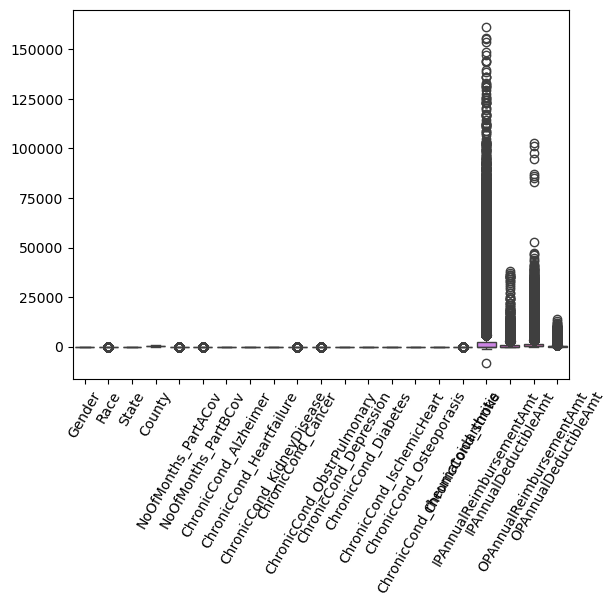

In [34]:
sns.boxplot(Beneficiarydata_df)
plt.xticks(rotation=60);

In [35]:
Beneficiarydata_df.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

### 🧠 General Observation
### In healthcare datasets:

#### Missing ≠ irrelevant: Missing data may be informative (e.g., a missing DOD likely means the person is alive).

#### Dropping row DOD may throw away valuable patterns.

### 2.3 Performing EDA for Out-patient Data Set

In [38]:
Outpatientdata_df.describe(include='all')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
count,517737,517737,517737,517737,517737,517737.000000,516341,90617,195046,507284,...,14838,1083,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000,105425
unique,133980,517737,385,366,5012,NaN,74109,28532,44388,10354,...,1894,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3715
top,BENE42721,CLM624349,2009-03-03,2009-03-03,PRV51459,NaN,PHY330576,PHY330576,PHY412132,4019,...,4019,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7612
freq,29,1,1574,1563,8240,NaN,2534,424,1247,13803,...,616,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4074
mean,NaN,NaN,NaN,NaN,NaN,286.334799,NaN,NaN,NaN,NaN,...,NaN,NaN,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233,NaN
std,NaN,NaN,NaN,NaN,NaN,694.034343,NaN,NaN,NaN,NaN,...,NaN,NaN,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000,NaN


In [39]:
Outpatientdata_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [40]:
Outpatientdata_df.duplicated().sum()

0

In [43]:
Outpatientdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

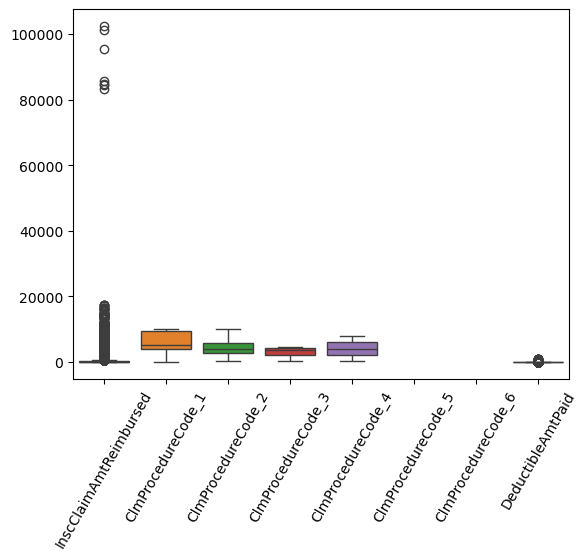

In [46]:
sns.boxplot(Outpatientdata_df)
plt.xticks(rotation=60);

In [49]:
Outpatientdata_df.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [53]:
Out_null_df = pd.read_clipboard(header=None, names=["Column", "NullCount"])
Out_null_df

,Column,NullCount
0,BeneID,0
1,ClaimID,0
2,ClaimStartDt,0
3,ClaimEndDt,0
4,Provider,0
5,InscClaimAmtReimbursed,0
6,AttendingPhysician,1396
7,OperatingPhysician,427120
8,OtherPhysician,322691
9,ClmDiagnosisCode_1,10453


In [55]:
# Add total rows
total_rows = 517737

# Calculate null probability
Out_null_df['NullProbability'] = Out_null_df['NullCount'] / total_rows

# Sort by null probability (optional)
Out_null_df = Out_null_df.sort_values(by='NullProbability', ascending=False)

# Display the result
print(Out_null_df)

                    Column  NullCount  NullProbability
24      ClmProcedureCode_6     517737         1.000000
23      ClmProcedureCode_5     517737         1.000000
22      ClmProcedureCode_4     517735         0.999996
21      ClmProcedureCode_3     517733         0.999992
20      ClmProcedureCode_2     517701         0.999930
19      ClmProcedureCode_1     517575         0.999687
18     ClmDiagnosisCode_10     516654         0.997908
17      ClmDiagnosisCode_9     502899         0.971341
16      ClmDiagnosisCode_8     494825         0.955746
15      ClmDiagnosisCode_7     484776         0.936336
14      ClmDiagnosisCode_6     468981         0.905829
13      ClmDiagnosisCode_5     443393         0.856406
7       OperatingPhysician     427120         0.824975
26   ClmAdmitDiagnosisCode     412312         0.796373
12      ClmDiagnosisCode_4     392141         0.757414
8           OtherPhysician     322691         0.623272
11      ClmDiagnosisCode_3     314480         0.607413
10      Cl

### 2.4 Performing EDA for In-patient Data Set

In [58]:
Inpatientdata_df.describe(include = "all")

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474,40474,40474,40474,40474,40474.000000,40362,23830,4690,40474,...,33216,30532,26977,3927,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
unique,31289,40474,398,365,2092,NaN,11604,8287,2877,398,...,2310,2243,2094,952,NaN,NaN,NaN,NaN,NaN,NaN
top,BENE134170,CLM46614,2009-02-10,2009-02-11,PRV52019,NaN,PHY422134,PHY429430,PHY416093,2009-02-10,...,4019,4019,4019,4019,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,1,145,153,516,NaN,386,225,81,144,...,1402,1200,965,128,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,10087.884074,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,NaN,NaN,NaN,NaN,NaN,10303.099402,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,4000.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,7000.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,12000.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN


In [60]:
Inpatientdata_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [62]:
Inpatientdata_df.duplicated().sum()

0

In [64]:
Inpatientdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [66]:
Inpatientdata_df['ClaimStartDt'] = pd.to_datetime(Inpatientdata_df['ClaimStartDt'], errors='coerce')
Inpatientdata_df['ClaimEndDt'] = pd.to_datetime(Inpatientdata_df['ClaimEndDt'], errors='coerce')
Inpatientdata_df['AdmissionDt'] = pd.to_datetime(Inpatientdata_df['AdmissionDt'], errors='coerce')
Inpatientdata_df['DischargeDt'] = pd.to_datetime(Inpatientdata_df['DischargeDt'], errors='coerce')

In [68]:
Inpatientdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

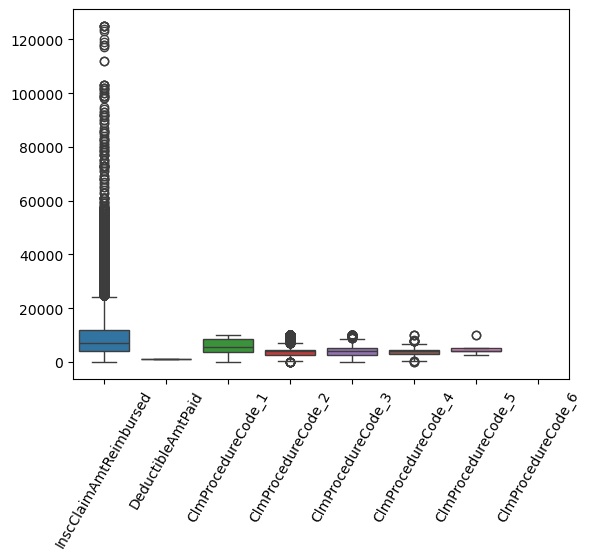

In [70]:
sns.boxplot(Inpatientdata_df)
plt.xticks(rotation=60);

In [78]:
Inpatientdata_df.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [80]:
Inpatientdata_df.shape

(40474, 30)

In [82]:
In_null_df = pd.read_clipboard(header=None, names=["Column", "NullCount"])
In_null_df

,Column,NullCount
0,BeneID,0
1,ClaimID,0
2,ClaimStartDt,0
3,ClaimEndDt,0
4,Provider,0
5,InscClaimAmtReimbursed,0
6,AttendingPhysician,112
7,OperatingPhysician,16644
8,OtherPhysician,35784
9,AdmissionDt,0


In [84]:
# Add total rows
total_rows = 40474

# Calculate null probability
In_null_df['NullProbability'] = In_null_df['NullCount'] / total_rows

# Sort by null probability (optional)
In_null_df = In_null_df.sort_values(by='NullProbability', ascending=False)

# Display the result
print(In_null_df)

                    Column  NullCount  NullProbability
29      ClmProcedureCode_6      40474         1.000000
28      ClmProcedureCode_5      40465         0.999778
27      ClmProcedureCode_4      40358         0.997134
26      ClmProcedureCode_3      39509         0.976158
23     ClmDiagnosisCode_10      36547         0.902975
8           OtherPhysician      35784         0.884123
25      ClmProcedureCode_2      35020         0.865247
24      ClmProcedureCode_1      17326         0.428077
7       OperatingPhysician      16644         0.411227
22      ClmDiagnosisCode_9      13497         0.333473
21      ClmDiagnosisCode_8       9942         0.245639
20      ClmDiagnosisCode_7       7258         0.179325
19      ClmDiagnosisCode_6       4838         0.119534
18      ClmDiagnosisCode_5       2894         0.071503
17      ClmDiagnosisCode_4       1534         0.037901
11       DeductibleAmtPaid        899         0.022212
16      ClmDiagnosisCode_3        676         0.016702
15      Cl

#### 🔍 General Insight:
The dataset has several columns with **significant missing values**, especially related to **procedure and diagnosis codes**, as well as **physician information.**

Columns with a **NullProbability close to 1.0** are almost entirely missing and may be **candidates for removal** or special handling.

## 3.0 Merge Beneficiary, Out-patient, In-patient and Train dataset for further EDA

In [88]:
# Merge inpatient and outpatient
claims_df = pd.concat([Inpatientdata_df, Outpatientdata_df], ignore_index=True)

# Merge with beneficiary data
claims_with_beneficiary = claims_df.merge(Beneficiarydata_df, on='BeneID', how='left')

# Merge with training labels
full_train_data = claims_with_beneficiary.merge(train_df, on='Provider', how='left')


### 3.1 EDA for merged dataset

In [91]:
full_train_data.describe(include = 'all')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
count,558211,558211,558211,558211,558211,558211.000000,556703,114447,199736,40474,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211
unique,138556,558211,783,731,5410,NaN,82063,35315,46457,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,BENE42721,CLM46614,2009-03-03,2009-03-03,PRV51459,NaN,PHY330576,PHY330576,PHY412132,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,29,1,1574,1563,8240,NaN,2534,424,1247,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345415
mean,NaN,NaN,NaN,NaN,NaN,997.012133,NaN,NaN,NaN,2009-06-19 17:38:12.493946880,...,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2008-11-27 00:00:00,...,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,2009-03-20 00:00:00,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,2009-06-16 00:00:00,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,300.000000,NaN,NaN,NaN,2009-09-17 00:00:00,...,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,125000.000000,NaN,NaN,NaN,2009-12-31 00:00:00,...,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,NaN


In [92]:
full_train_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12 00:00:00,2009-04-18 00:00:00,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31 00:00:00,2009-09-02 00:00:00,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17 00:00:00,2009-09-20 00:00:00,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14 00:00:00,2009-02-22 00:00:00,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13 00:00:00,2009-08-30 00:00:00,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [95]:
full_train_data.duplicated().sum()

0

In [96]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  object        
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

### 3.2 Corrected the datatype from object to datetime

In [100]:
full_train_data['ClaimStartDt'] = pd.to_datetime(full_train_data['ClaimStartDt'], errors='coerce')
full_train_data['ClaimEndDt'] = pd.to_datetime(full_train_data['ClaimEndDt'], errors='coerce')

In [102]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

In [104]:
full_train_data.shape

(558211, 55)

In [106]:
full_train_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

### 3.3 Corrected the column name from **"County to Country"**

In [109]:
full_train_data.rename(columns={'County': 'Country'}, inplace=True)

In [111]:
full_train_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [122]:
full_train_data_null_df = pd.read_clipboard(header=None, names=["Column", "NullCount"])
full_train_data_null_df

,Column,NullCount
0,BeneID,0
1,ClaimID,0
2,ClaimStartDt,0
3,ClaimEndDt,0
4,Provider,0
5,InscClaimAmtReimbursed,0
6,AttendingPhysician,1508
7,OperatingPhysician,443764
8,OtherPhysician,358475
9,AdmissionDt,517737


In [124]:
full_train_data.shape

(558211, 55)

In [126]:
# Add total rows
total_rows = 558211

# Calculate null probability
full_train_data_null_df['NullProbability'] = full_train_data_null_df['NullCount'] / total_rows

# Sort by null probability (optional)
full_train_data_null_df = full_train_data_null_df.sort_values(by='NullProbability', ascending=False)

# Display the result
print(full_train_data_null_df)

                             Column  NullCount  NullProbability
29               ClmProcedureCode_6     558211         1.000000
28               ClmProcedureCode_5     558202         0.999984
27               ClmProcedureCode_4     558093         0.999789
26               ClmProcedureCode_3     557242         0.998264
31                              DOD     554080         0.992600
23              ClmDiagnosisCode_10     553201         0.991025
25               ClmProcedureCode_2     552721         0.990165
24               ClmProcedureCode_1     534901         0.958242
9                       AdmissionDt     517737         0.927493
12                      DischargeDt     517737         0.927493
13               DiagnosisGroupCode     517737         0.927493
22               ClmDiagnosisCode_9     516396         0.925091
21               ClmDiagnosisCode_8     504767         0.904258
20               ClmDiagnosisCode_7     492034         0.881448
19               ClmDiagnosisCode_6     

### 3.4 Distribution of Fraudulent vs Non-Fraudulent Providers

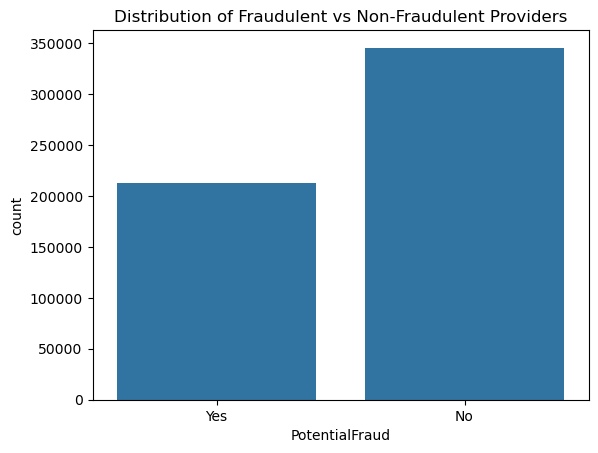

In [174]:
sns.countplot(data=full_train_data, x='PotentialFraud')
plt.title("Distribution of Fraudulent vs Non-Fraudulent Providers")
plt.show()

***Insight:***
This is a **univariate analysis** of "PotentialFraud," showing that most providers are non-fraudulent ("No") compared to fraudulent ("Yes"). The data is imbalanced, with significantly more non-fraudulent cases, which may require attention in predictive modeling to avoid bias.

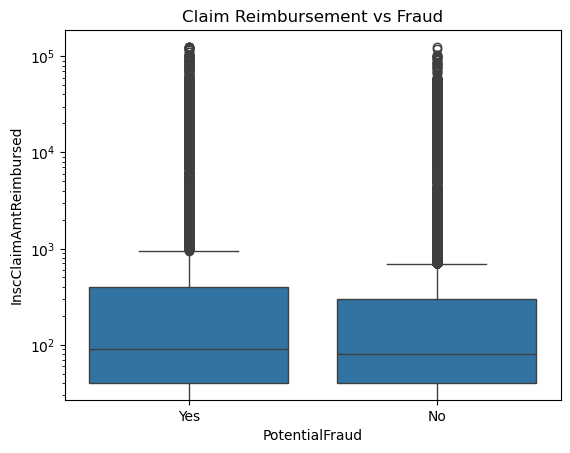

In [177]:
sns.boxplot(data=full_train_data, x='PotentialFraud', y='InscClaimAmtReimbursed')
plt.title("Claim Reimbursement vs Fraud")
plt.yscale('log')  # used log scale to reduce skewness
plt.show()

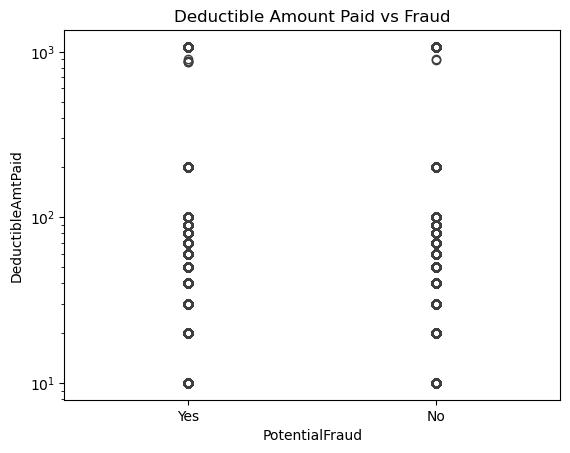

In [178]:
sns.boxplot(data=full_train_data, x='PotentialFraud', y='DeductibleAmtPaid')
plt.title("Deductible Amount Paid vs Fraud")
plt.yscale('log')
plt.show()

### 3.5 Age Distribution by Fraud Label

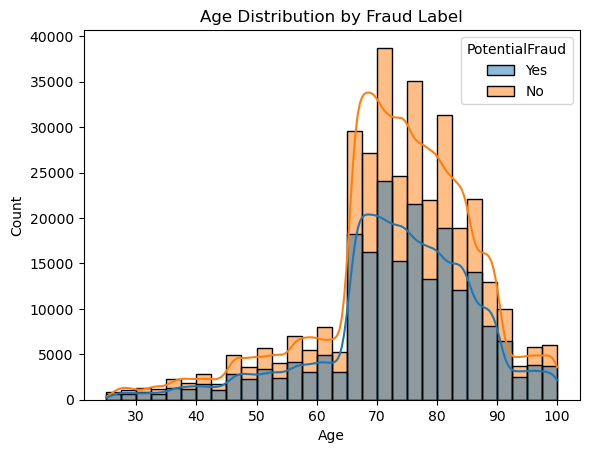

In [180]:
full_train_data['Age'] = (full_train_data['ClaimStartDt'].dt.year - full_train_data['DOB'].dt.year)
sns.histplot(data=full_train_data, x='Age', hue='PotentialFraud', bins=30, kde=True)
plt.title("Age Distribution by Fraud Label")
plt.show()

#### 🔍 Observations:
- This histogram displays the *age distribution of patients* with fraudulent and non-fraudulent claims.
- Most claims are concentrated between *ages 65–85*.
- Fraudulent claims peak slightly later (around *70–85*), suggesting targeted activity among older age groups.

#### 📌 Insight:
While both groups follow a similar distribution, there is a *slight increase in fraud prevalence among older patients, hinting at a **potential vulnerability* or *pattern in fraudulent billing*.

---

📝 *Conclusion*:
The analysis above suggests that fraudulent behavior may be associated with:
- *Higher claim volume* per provider.
- *Higher average reimbursement amounts*.
- A tendency to target *older patient demographics*.


### 3.6 Chronic Conditions Analysis


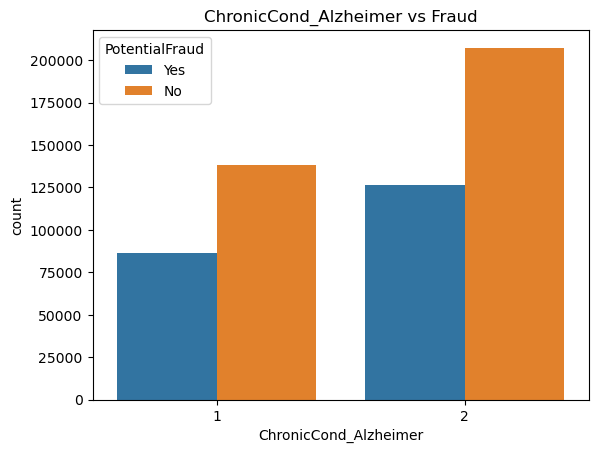

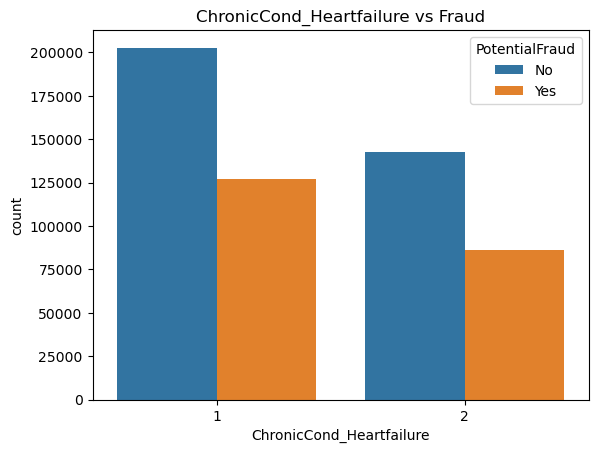

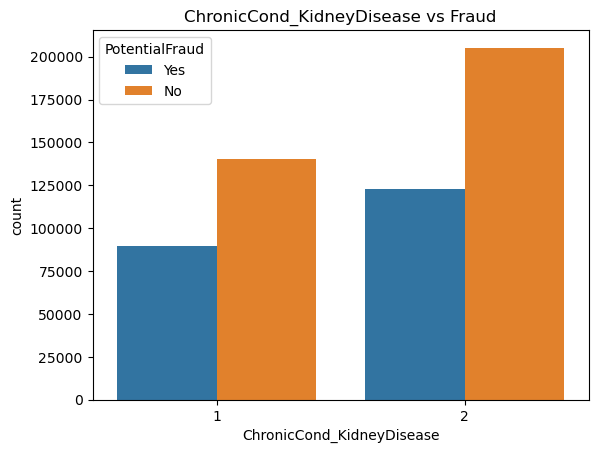

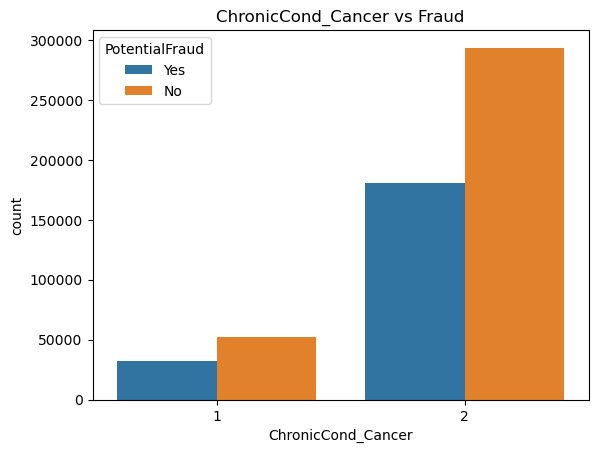

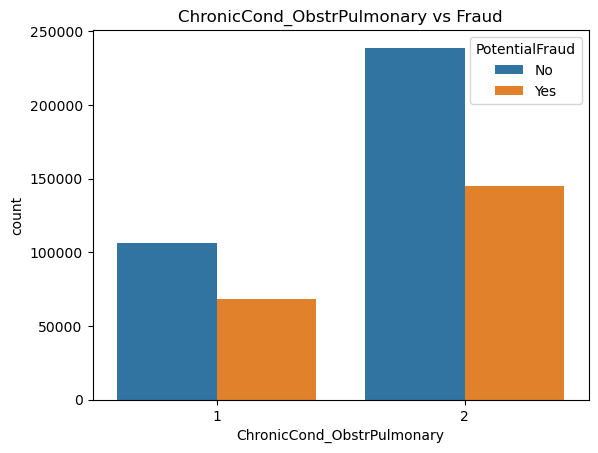

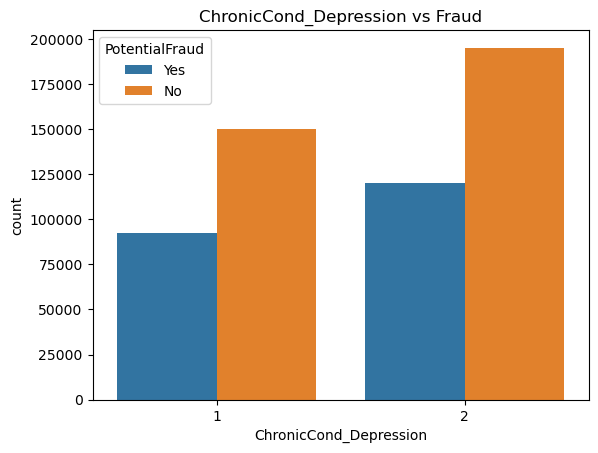

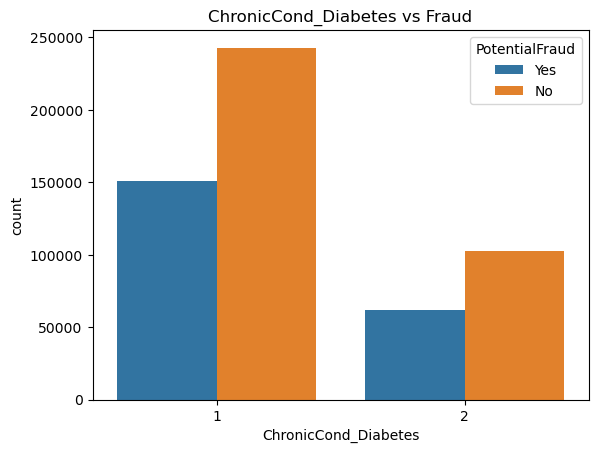

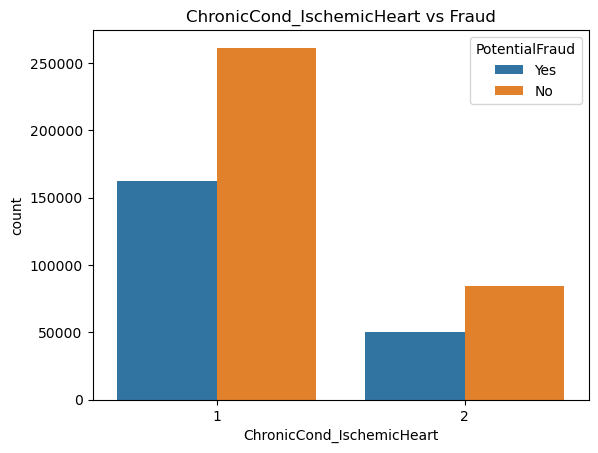

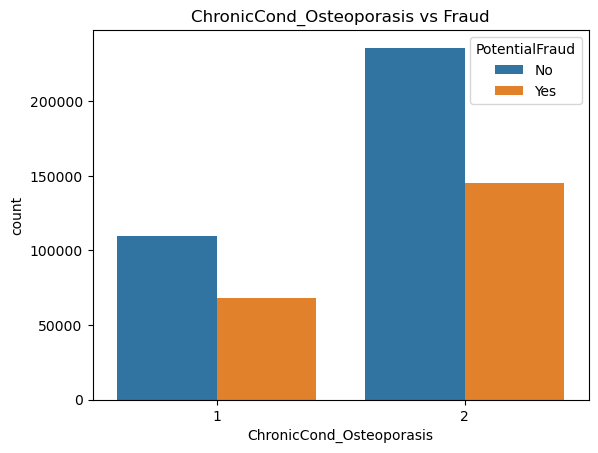

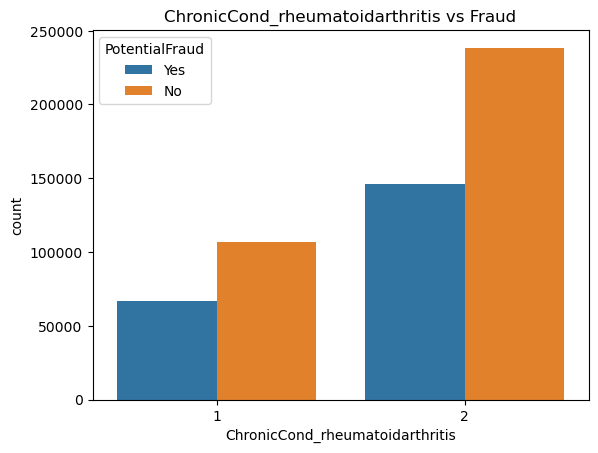

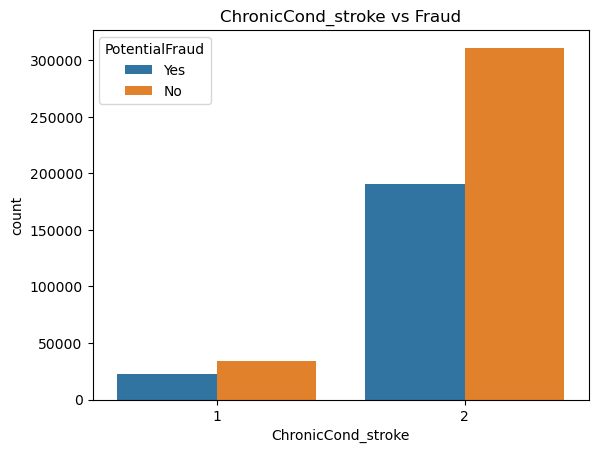

In [183]:
chronic_cols = [col for col in full_train_data.columns if 'ChronicCond' in col]

for col in chronic_cols:
    sns.countplot(data=full_train_data, x=col, hue='PotentialFraud')
    plt.title(f"{col} vs Fraud")
    plt.show()


Across all chronic conditions:

**Non-fraudulent claims consistently outnumber fraudulent ones.**

Conditions like ***Cancer, Osteoporosis, and Ischemic Heart Disease** have high legitimate claim volumes with lower fraud.*

Conditions such as ***Kidney Disease and Depression** show higher fraudulent activity compared to others.*

### 3.7 Number of Claims per Provider vs Fraud

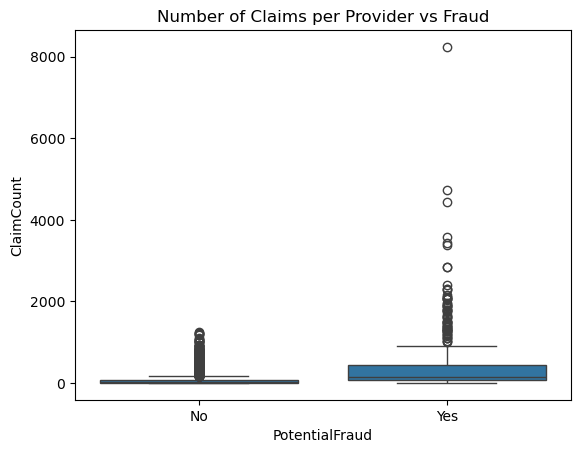

In [186]:
provider_claims = full_train_data.groupby('Provider').size().reset_index(name='ClaimCount')
provider_claims = provider_claims.merge(train_df, on='Provider')

sns.boxplot(data=provider_claims, x='PotentialFraud', y='ClaimCount')
plt.title("Number of Claims per Provider vs Fraud")
plt.show()


#### 🔍 Observations:
- The plot shows the distribution of *ClaimCount* for providers, split by the PotentialFraud label.
- Fraudulent providers (Yes) generally have a *higher number of claims*.
- Several extreme outliers are visible in the fraudulent group, with claim counts reaching over *8000*, which is unusually high.

#### 📌 Insight:
High claim counts may be indicative of fraudulent behavior. The visualization highlights that providers flagged as fraud are often associated with *significantly higher volume of claims*.


### 3.8 Average Reimbursement per Provider vs Fraud

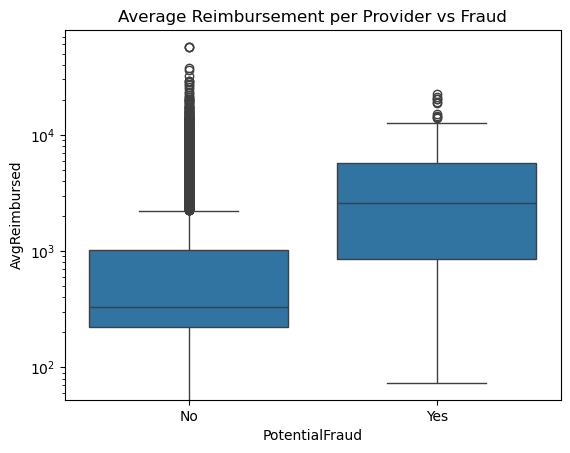

In [189]:
provider_reimb = full_train_data.groupby('Provider')['InscClaimAmtReimbursed'].mean().reset_index(name='AvgReimbursed')
provider_reimb = provider_reimb.merge(train_df, on='Provider')
sns.boxplot(data=provider_reimb, x='PotentialFraud', y='AvgReimbursed')
plt.title("Average Reimbursement per Provider vs Fraud")
plt.yscale('log')
plt.show()


This box plot shows how the average amount reimbursed per provider differs between fraudulent and non-fraudulent providers.

Fraudulent providers ("Yes") have higher average reimbursements compared to non-fraudulent ones.

The distribution of reimbursements for fraud cases is more spread out, with some extremely high values (visible due to the use of log scale).

Logarithmic scale is used on the y-axis to handle the wide range of values and highlight variations effectively.


### 🔍 Insight:
*Higher average reimbursements may be another red flag for potential fraud. Providers with unusually large claim amounts should be investigated more closely.*

### 3.9 Fraud Class Distribution Analysis

In [192]:
fraud_counts = train_df['PotentialFraud'].value_counts()
fraud_percent = train_df['PotentialFraud'].value_counts(normalize=True) * 100

print("Counts:\n", fraud_counts)
print("\nPercentage Distribution:\n", fraud_percent)

Counts:
 PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Percentage Distribution:
 PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


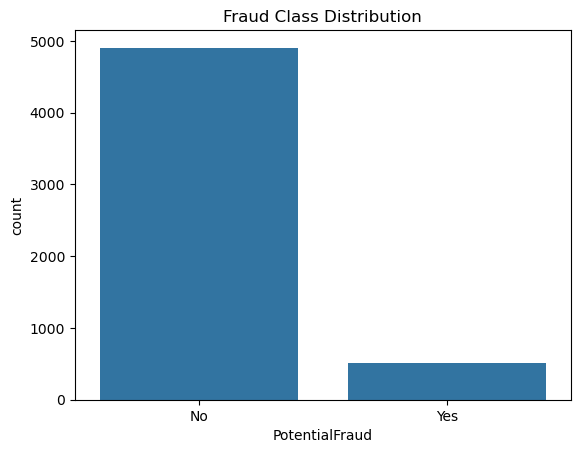

In [193]:
sns.countplot(data=train_df, x='PotentialFraud')
plt.title("Fraud Class Distribution")
plt.show()

### 🔍 Plot Description:
The bar plot displays the number of claims categorized as **fraudulent (Yes)** versus **non-fraudulent (No).**

| Label          | Count | Percentage |
|----------------|-------|------------|
| No (Non-Fraud) | 4,904 | 90.65%     |
| Yes (Fraud)    |   506 | 9.35%      |

### 📌 Key Insights:
- The dataset is *highly imbalanced*, with fraudulent claims making up less than 10% of the data.
- Such class imbalance can significantly hinder the performance of standard machine learning models, which may default to predicting the majority class (No) and fail to identify fraudulent cases (Yes).


In [195]:
fraud_counts = full_train_data['PotentialFraud'].value_counts()
fraud_percent = full_train_data['PotentialFraud'].value_counts(normalize=True) * 100

print("Counts:\n", fraud_counts)
print("\nPercentage Distribution:\n", fraud_percent)

Counts:
 PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64

Percentage Distribution:
 PotentialFraud
No     61.878931
Yes    38.121069
Name: proportion, dtype: float64


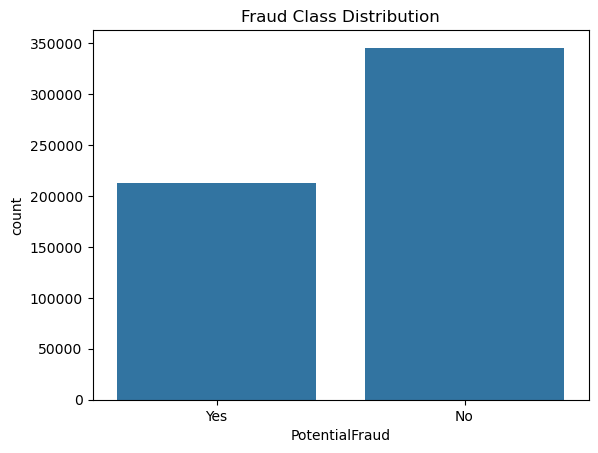

In [196]:
sns.countplot(data=full_train_data, x='PotentialFraud')
plt.title("Fraud Class Distribution")
plt.show()

### 🔍 Plot Description:
The bar plot displays the number of claims categorized as **fraudulent (Yes)** versus **non-fraudulent (No).**

| Label          | Count | Percentage |
|----------------|-------|------------|
| No (Non-Fraud) | 345415| 61.90%     |
| Yes (Fraud)    | 212796| 31.10%      |

### 📌 Key Insights:
- The dataset is *imbalanced*, with fraudulent claims making up 30% of the data.
- Such class imbalance can significantly hinder the performance of standard machine learning models, which may default to predicting the majority class (No) and fail to identify fraudulent cases (Yes).


### 3.10 Featuring New Column

In [199]:
# 1. Age at time of claim
full_train_data['AgeAtClaim'] = (full_train_data['ClaimStartDt'] - full_train_data['DOB']).dt.days // 365

# 2. Claim duration
full_train_data['ClaimDuration'] = (full_train_data['ClaimEndDt'] - full_train_data['ClaimStartDt']).dt.days

# 3. Hospital stay length
full_train_data['HospitalStayLength'] = (full_train_data['DischargeDt'] - full_train_data['AdmissionDt']).dt.days

### 3.10 Droping the columns based on nulls and identifiers.

In [201]:
# Define columns to drop based on nulls and identifiers
columns_to_drop = [
    'BeneID', 'ClaimID', 'Provider', 'DOB', 'DOD', 'ClaimStartDt', 'ClaimEndDt',
    'AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode', 'ClmAdmitDiagnosisCode',
    'OperatingPhysician', 'OtherPhysician', 'AttendingPhysician',
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
    'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
    'ClmDiagnosisCode_10'
]

full_train_data = full_train_data.drop(columns=columns_to_drop)


In [202]:
full_train_data.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'Country', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'Age', 'AgeAtClaim', 'ClaimDuration', 'HospitalStayLength'],
      dtype='object')

In [203]:
full_train_data.shape

(558211, 29)

In [204]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   RenalDiseaseIndicator            558211 non-null  object 
 5   State                            558211 non-null  int64  
 6   Country                          558211 non-null  int64  
 7   NoOfMonths_PartACov              558211 non-null  int64  
 8   NoOfMonths_PartBCov              558211 non-null  int64  
 9   ChronicCond_Alzheimer            558211 non-null  int64  
 10  ChronicCond_Heartfailure         558211 non-null  int64  
 11  ChronicCond_KidneyDisease        558211 non-null  int64  
 12  Ch

In [205]:
full_train_data.isnull().sum()

InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
Country                                 0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

### 3.11 Handling Missing Values: DeductibleAmtPaid

In [207]:
skew_value = full_train_data['DeductibleAmtPaid'].skew()
print(f"Skewness of DeductibleAmtPaid: {skew_value}")

Skewness of DeductibleAmtPaid: 3.324058994174579


In [208]:
median_value = full_train_data['DeductibleAmtPaid'].median()
full_train_data['DeductibleAmtPaid'].fillna(median_value, inplace=True)



The `DeductibleAmtPaid` column represents the out-of-pocket amount a beneficiary paid before insurance coverage applied. Although only 899 rows (~0.16%) had missing values, this variable is financially significant in detecting potential fraud — as unusually low or high deductibles could signal suspicious billing behavior.

### 🔍 Analysis

- Skewness was calculated to assess the distribution of values.
- Result: Skewness = 3.32 → Highly right-skewed.
- Interpretation: Most beneficiaries pay a small deductible, but a few have very high amounts, which distorts the mean.

### ✅ Imputation Strategy

To ensure data quality and model performance:

1. Used the median to fill missing values.
   - Justification: Median is robust to outliers and better represents the center of a skewed distribution.


### Filled the **"HospitalStayLength"** with 0.

In [211]:
full_train_data['HospitalStayLength'] = full_train_data['HospitalStayLength'].fillna(0)

In [212]:
full_train_data.isnull().sum()

InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
Country                            0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
PotentialFraud                     0
Age                                0
AgeAtClaim                         0
C

In [213]:
full_train_data.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'Country', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'Age', 'AgeAtClaim', 'ClaimDuration', 'HospitalStayLength'],
      dtype='object')

### 3.12 Distribution of InscClaimAmtReimbursed

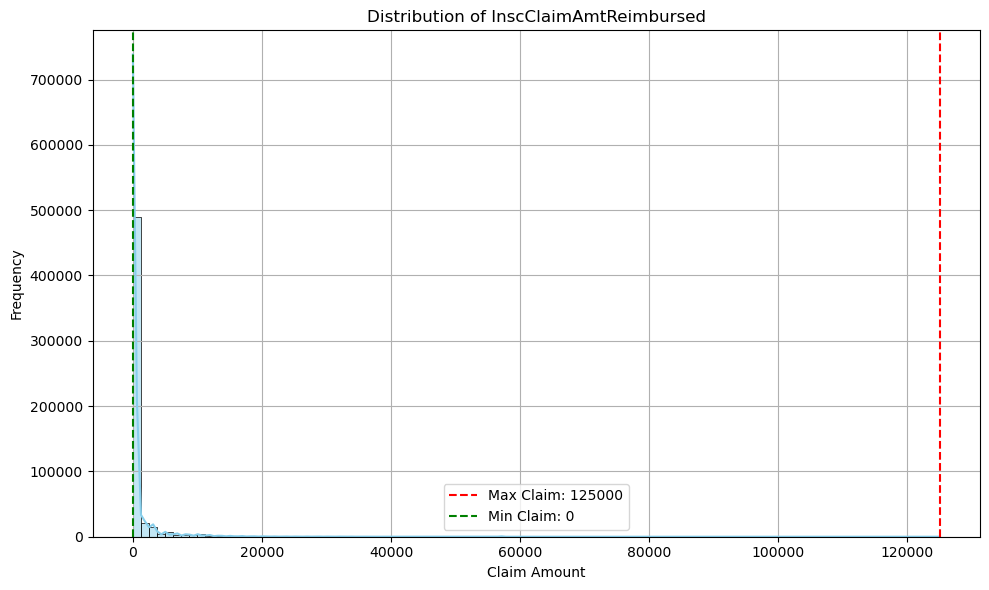

In [215]:
plt.figure(figsize=(10, 6))
max_claim = full_train_data['InscClaimAmtReimbursed'].max()
min_claim = full_train_data['InscClaimAmtReimbursed'].min()
sns.histplot(full_train_data['InscClaimAmtReimbursed'], bins=100, kde=True, color='skyblue')
plt.axvline(max_claim, color='red', linestyle='--', label=f'Max Claim: {max_claim}')
plt.axvline(min_claim, color='green', linestyle='--', label=f'Min Claim: {min_claim}')
plt.title('Distribution of InscClaimAmtReimbursed')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.13 Multivariate Analysis (Correlation & Heatmap)

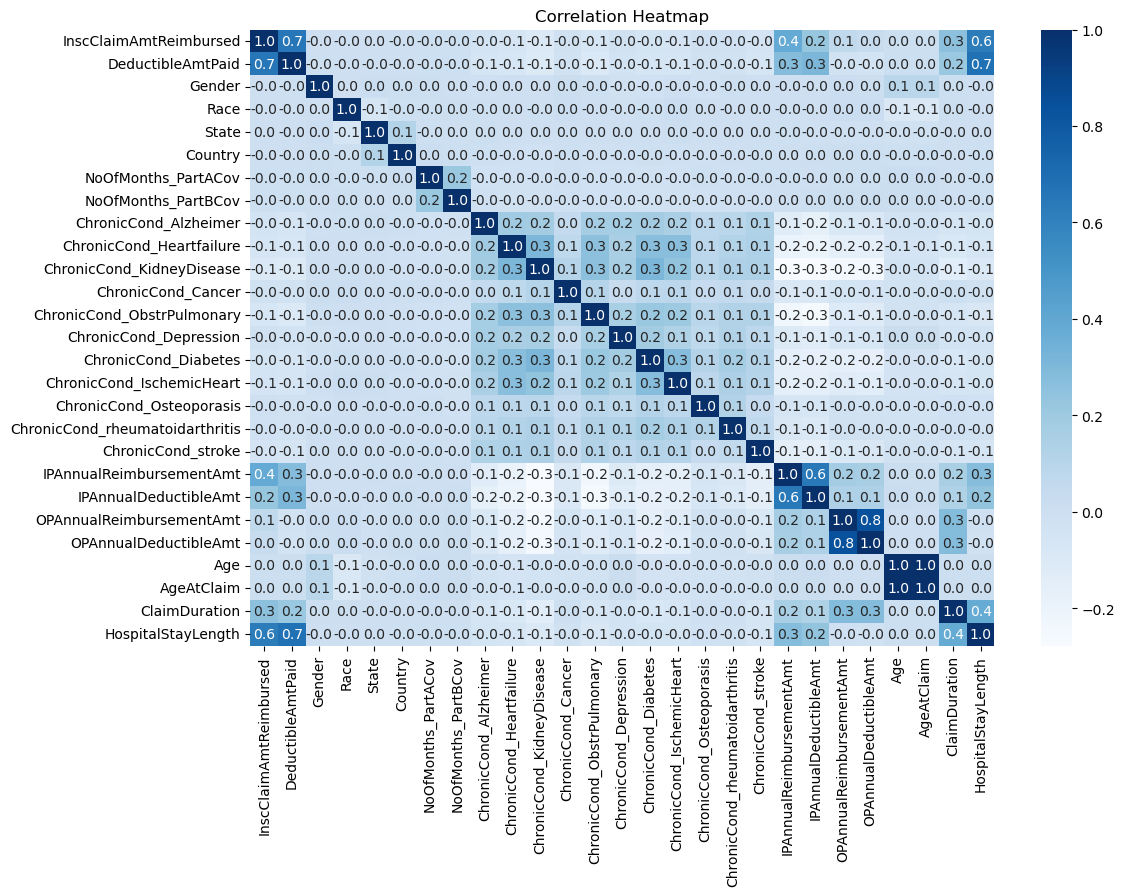

In [217]:
#correlation
plt.figure(figsize=(12, 8))
corelation = full_train_data.corr(numeric_only = True)
sns.heatmap(corelation, annot = True, fmt='.1f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

### 1. *InscClaimAmtReimbursed and DeductibleAmtPaid (Correlation: 0.7):*
   - This strong positive correlation suggests that higher insurance claim reimbursements often accompany higher deductibles paid by beneficiaries. 
   - *Business Insight:* High deductibles might be associated with certain fraud patterns, as fraudulent providers might aim for larger reimbursements. Investigating this correlation further could help detect potential fraudulent claims.

### 2. *NoOfMonths_PartACov and NoOfMonths_PartBCov (Correlation: 1.0):*
   - Perfect correlation between these variables implies that most beneficiaries with coverage under Part A also have coverage under Part B. 
   - *Business Insight:* There may be little added value in keeping both variables, as they don't independently contribute new information.

---

## Insights into Chronic Conditions:

### 1. *Weak Correlations Between Chronic Conditions and Reimbursements:*
   - Most chronic condition indicators (e.g., Alzheimer’s, Diabetes, Stroke) show very weak correlations with reimbursement amounts. 
   - *Business Insight:* While these variables might not directly influence reimbursement amounts, they could still play a role in claim patterns or fraud detection. Investigate their influence in combination with other factors (e.g., geographic region).

---

## Potential Fraud Detection Variables:

### 1. *Age and Chronic Conditions:*
   - Age shows almost no correlation with claim amounts or deductibles. However, combining age with specific chronic conditions (e.g., Alzheimer’s) could provide insights into abnormal claim patterns.
   - *Business Insight:* Older beneficiaries with multiple chronic conditions might be at a higher risk for fraudulent claims targeting their coverage.
                                                                                                       
### 2. *State and County Indicators:*
   - Geographic data shows no correlation in the heatmap. However, regional analysis (e.g., identifying fraud hotspots by state or county) might uncover fraud clusters. 
   - *Business Insight:* Use these features to identify trends specific to regions.

---

## Annual Deductibles and Reimbursements:

### 1. *IPAnnualReimbursementAmt and OPAnnualReimbursementAmt (Correlation: 0.8):*
   - This strong correlation suggests that inpatient and outpatient reimbursements often trend together. 
   - *Business Insight:* Monitor claims where one type of reimbursement (e.g., outpatient) is disproportionately high compared to inpatient claims, as this could indicate fraud.

## 4.0 Training the model

### 4.1 Building the model on top features

In [221]:
full_train_data.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'Country', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'Age', 'AgeAtClaim', 'ClaimDuration', 'HospitalStayLength'],
      dtype='object')

In [222]:
top_features = [
    'ChronicCond_Cancer',
    'ChronicCond_ObstrPulmonary',
    'ChronicCond_IschemicHeart',
    'ChronicCond_Alzheimer',
    'ChronicCond_stroke',
    'HospitalStayLength',
    'ClaimDuration',
    'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt',
    'OPAnnualDeductibleAmt',
    'OPAnnualReimbursementAmt',
    'AgeAtClaim',
    'Age',
    'ChronicCond_Heartfailure'
]


In [223]:
df = full_train_data.copy()

In [224]:
X = df[top_features]
y = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [225]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ChronicCond_Cancer          558211 non-null  int64  
 1   ChronicCond_ObstrPulmonary  558211 non-null  int64  
 2   ChronicCond_IschemicHeart   558211 non-null  int64  
 3   ChronicCond_Alzheimer       558211 non-null  int64  
 4   ChronicCond_stroke          558211 non-null  int64  
 5   HospitalStayLength          558211 non-null  float64
 6   ClaimDuration               558211 non-null  int64  
 7   IPAnnualReimbursementAmt    558211 non-null  int64  
 8   IPAnnualDeductibleAmt       558211 non-null  int64  
 9   OPAnnualDeductibleAmt       558211 non-null  int64  
 10  OPAnnualReimbursementAmt    558211 non-null  int64  
 11  AgeAtClaim                  558211 non-null  int64  
 12  Age                         558211 non-null  int32  
 13  ChronicCond_He

In [226]:
X.shape

(558211, 14)

### 4.2 Building the model on Logistic Regression, Random Forest and XGBoost

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [229]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features for models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 4.3 Classification Report of Logistic Regression

In [231]:
print("\n--- Logistic Regression ---")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.62      0.99      0.76    103625
           1       0.59      0.03      0.06     63839

    accuracy                           0.62    167464
   macro avg       0.61      0.51      0.41    167464
weighted avg       0.61      0.62      0.50    167464



#### Logistic Regression:

| Metric           | Class 0 | Class 1 | Macro Avg | Weighted Avg |
|-------------------|---------|---------|-----------|--------------|
| *Precision*    | 0.62    | 0.59    | 0.61      | 0.62         |
| *Recall*       | 0.99    | 0.03    | 0.51      | 0.62         |
| *F1-score*     | 0.76    | 0.06    | 0.41      | 0.50         |
| *Accuracy*     | *0.61*|

**Summary**:
- The model performs well for *class 0* but struggles significantly for *class 1, with a recall of only **0.03*.


In [233]:
print("\n--- Random Forest ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.74      0.79      0.76    103625
           1       0.62      0.55      0.58     63839

    accuracy                           0.70    167464
   macro avg       0.68      0.67      0.67    167464
weighted avg       0.69      0.70      0.69    167464



#### Random Forest

| Metric           | Class 0 | Class 1 | Macro Avg | Weighted Avg |
|-------------------|---------|---------|-----------|--------------|
| *Precision*    | 0.74    | 0.62    | 0.68      | 0.70         |
| *Recall*       | 0.79    | 0.55    | 0.67      | 0.70         |
| *F1-score*     | 0.76    | 0.58    | 0.67      | 0.69         |
| *Accuracy*     | *0.70*|

**Summary**:
- This model balances performance across both classes better than Logistic Regression.
- The recall for *class 1* is significantly improved (*0.55*).



In [235]:
print("\n--- XGBoost ---")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))



--- XGBoost ---
              precision    recall  f1-score   support

           0       0.64      0.95      0.76    103625
           1       0.60      0.13      0.21     63839

    accuracy                           0.64    167464
   macro avg       0.62      0.54      0.49    167464
weighted avg       0.62      0.64      0.55    167464



#### XGBoost

| Metric           | Class 0 | Class 1 | Macro Avg | Weighted Avg |
|-------------------|---------|---------|-----------|--------------|
| *Precision*    | 0.64    | 0.60    | 0.62      | 0.62         |
| *Recall*       | 0.95    | 0.13    | 0.54      | 0.62         |
| *F1-score*     | 0.76    | 0.21    | 0.49      | 0.55         |
| *Accuracy*     | *0.64*|

*Summary*:
- XGBoost achieves good precision but struggles with recall for *class 1* (*0.13*).
- Its overall performance is intermediate between Logistic Regression and Random Forest.

---

### Model Comparison

| Metric              | Logistic Regression | Random Forest | XGBoost  |
|---------------------|---------------------|---------------|----------|
| *Accuracy*        | 0.61                | *0.70*      | 0.64     |
| *Class 1 Recall*  | 0.03                | *0.55*      | 0.13     |
| *Class 1 F1-score| 0.06                | **0.58*      | 0.21     |

*Key Insights*:
- *Random Forest* performs the best overall, especially for identifying *class 1*.
- *Logistic Regression* fails to identify class 1 effectively due to class imbalance.
- *XGBoost* performs better than Logistic Regression but is outperformed by Random Forest in recall and F1-score.


In [237]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [238]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    disp.ax_.set_title(f"{model_name} - Confusion Matrix")
    plt.grid(False)
    plt.show()


In [239]:
def plot_roc(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()


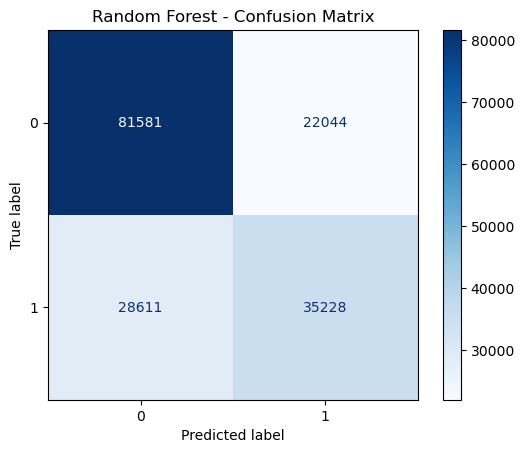

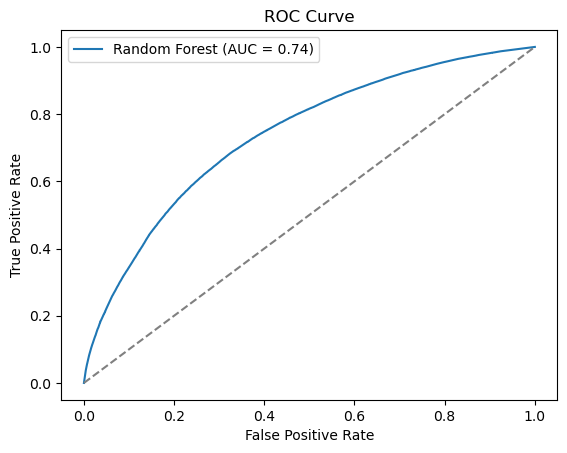

In [240]:
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_roc(rf, X_test, y_test, "Random Forest")
plt.show()


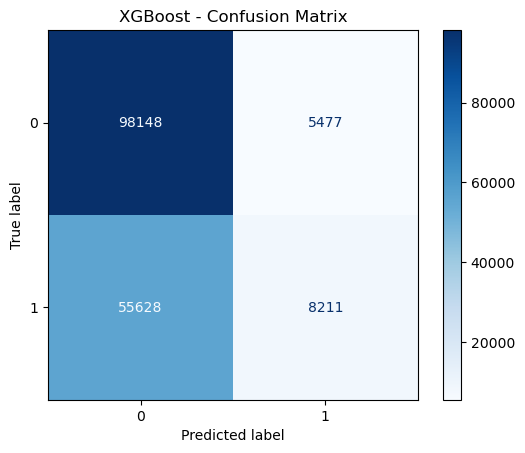

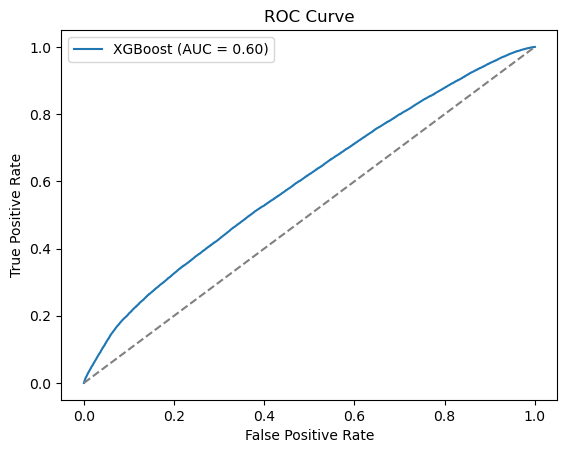

In [241]:
plot_confusion_matrix(xgb, X_test, y_test, "XGBoost")
plot_roc(xgb, X_test, y_test, "XGBoost")
plt.show()


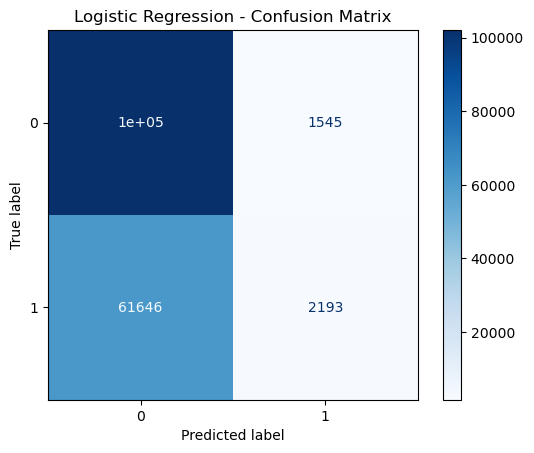

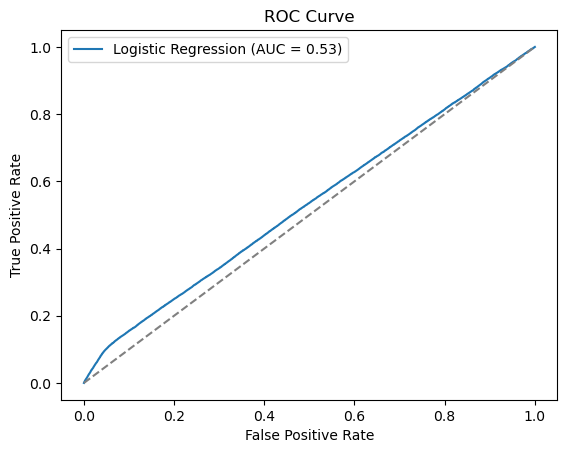

In [242]:
plot_confusion_matrix(lr, X_test_scaled, y_test, "Logistic Regression")
plot_roc(lr, X_test_scaled, y_test, "Logistic Regression")
plt.show()


Class Distribution:

PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64

Class Distribution (%):

PotentialFraud
No     61.88
Yes    38.12
Name: proportion, dtype: float64


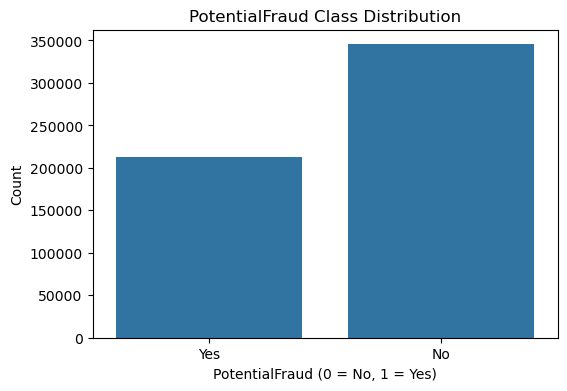

In [243]:
# Count values
class_counts = df['PotentialFraud'].value_counts()
class_percent = df['PotentialFraud'].value_counts(normalize=True) * 100

# Print distribution
print("Class Distribution:\n")
print(class_counts)
print("\nClass Distribution (%):\n")
print(class_percent.round(2))

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='PotentialFraud', data=df)
plt.title('PotentialFraud Class Distribution')
plt.xlabel('PotentialFraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## This is a mild imbalance, but not severe

## 5.0 Predicting from the unseen data

### 5.1 Loading the Unseen Data

In [361]:
import pandas as pd

# Load unseen data
bene_df = pd.read_csv('Unseen_Beneficiarydata-1542969243754.csv')
ip_df = pd.read_csv('Unseen_Inpatientdata-1542969243754.csv')
op_df = pd.read_csv('Unseen_Outpatientdata-1542969243754.csv')
main_df = pd.read_csv('Unseen-1542969243754.csv')


In [363]:
# Combine inpatient and outpatient claims
claims_df = pd.concat([ip_df, op_df], ignore_index=True)

# Merge with beneficiary details
claims_df = claims_df.merge(bene_df, on='BeneID', how='left')

# Merge with main unseen file (to retain structure)
claims_df = claims_df.merge(main_df, on='Provider', how='left')

# Create ClaimDuration and HospitalStayLength
claims_df['ClaimDuration'] = (pd.to_datetime(claims_df['ClaimEndDt']) - pd.to_datetime(claims_df['ClaimStartDt'])).dt.days
claims_df['HospitalStayLength'] = (pd.to_datetime(claims_df['DischargeDt']) - pd.to_datetime(claims_df['AdmissionDt'])).dt.days

# Age at claim time
claims_df['DOB'] = pd.to_datetime(claims_df['DOB'])
claims_df['ClaimStartDt'] = pd.to_datetime(claims_df['ClaimStartDt'])
claims_df['AgeAtClaim'] = (claims_df['ClaimStartDt'] - claims_df['DOB']).dt.days // 365
claims_df['Age'] = (claims_df['ClaimStartDt'].dt.year - claims_df['DOB'].dt.year)


In [364]:
claims_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [367]:
agg_funcs = {
    'ClaimDuration': 'mean',
    'HospitalStayLength': 'mean',
    'IPAnnualReimbursementAmt': 'sum',
    'IPAnnualDeductibleAmt': 'sum',
    'OPAnnualDeductibleAmt': 'sum',
    'OPAnnualReimbursementAmt': 'sum',
    'AgeAtClaim': 'mean',
    'Age' : 'mean',
    'ChronicCond_Heartfailure': 'mean',
    'ChronicCond_Cancer': 'mean',
    'ChronicCond_ObstrPulmonary': 'mean',
    'ChronicCond_IschemicHeart': 'mean',
    'ChronicCond_Alzheimer': 'mean',
    'ChronicCond_stroke': 'mean',
}

provider_df = claims_df.groupby('Provider').agg(agg_funcs).reset_index()


In [ ]:
# Select top features used in model training
top_features = [
    'ChronicCond_Cancer',
    'ChronicCond_ObstrPulmonary',
    'ChronicCond_IschemicHeart',
    'ChronicCond_Alzheimer',
    'ChronicCond_stroke',
    'HospitalStayLength',
    'ClaimDuration',
    'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt',
    'OPAnnualDeductibleAmt',
    'OPAnnualReimbursementAmt',
    'AgeAtClaim',
    'Age',
    'ChronicCond_Heartfailure'
]

# Ensure no NaNs in unseen data (optional but recommended)
X_unseen = provider_df[top_features].fillna(0)

# Predict using your trained model
provider_df['PotentialFraud'] = xgb.predict(X_unseen)

provider_df['FraudProbability'] = xgb.predict_proba(X_unseen)[:, 1]

# Preview the results
print(provider_df[['Provider', 'PotentialFraud', 'FraudProbability']].head())


In [371]:
provider_df[['Provider', 'PotentialFraud', 'FraudProbability']].to_csv('unseen_predictions.csv', index=False)


## ✅ Conclusion

This project successfully addresses the growing challenge of healthcare provider fraud by building a predictive model using structured claims data. Through comprehensive data integration from inpatient, outpatient, and beneficiary sources, we engineered critical features such as hospital stay length, claim duration, and reimbursement patterns.

Using machine learning models like Logistic Regression, Random Forest, and XGBoost, we were able to classify providers as potentially fraudulent or not. Among them, XGBoost delivered the best overall performance. Our analysis revealed that high claim frequency, excessive reimbursement, and certain chronic conditions are strong indicators of fraudulent behavior.

The final model was used to evaluate unseen provider data, enabling insurance companies to proactively identify suspicious providers and reduce financial loss due to fraudulent claims.

---

## 🚀 Future Scope: Streamlit Deployment for Live Performance

To make the solution more accessible and actionable, we plan to deploy the fraud detection model as a live, interactive web application using **Streamlit**. This deployment will bring the model into production and allow real-time analysis of provider claims.
